<a href="https://colab.research.google.com/github/haosulab/ManiSkill2/blob/main/examples/tutorials/advanced_rendering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Install ManiSkill2 (for Colab)
# below fixes some bugs introduced by some recent Colab changes
!mkdir -p /usr/share/vulkan/icd.d
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill2/main/docker/nvidia_icd.json
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill2/main/docker/10_nvidia.json
!mv nvidia_icd.json /usr/share/vulkan/icd.d
!mv 10_nvidia.json /usr/share/glvnd/egl_vendor.d/10_nvidia.json
# dependencies
!pip install setuptools==65.5.0
!apt-get install -y --no-install-recommends libvulkan-dev
!git clone --depth 1 --branch v0.21.0 https://github.com/openai/gym.git
!pip install -e gym
!pip install mani_skill2

/usr/bin/zsh: /home/eric/anaconda3/envs/legged_studio/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
/usr/bin/zsh: /home/eric/anaconda3/envs/legged_studio/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
/usr/bin/zsh: /home/eric/anaconda3/envs/legged_studio/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
/usr/bin/zsh: /home/eric/anaconda3/envs/legged_studio/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
mv: replace '/usr/share/vulkan/icd.d/nvidia_icd.json', overriding mode 0644 (rw-r--r--)? ^C
/usr/bin/zsh: /home/eric/anaconda3/envs/legged_studio/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
mv: replace '/usr/share/glvnd/egl_vendor.d/10_nvidia.json', overriding mode 0644 (rw-r--r--)? ^C
/usr/bin/zsh: /home/eric/anaconda3/envs/legged_studio/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
/usr/bin/zsh:

Make sure you are using a GPU runtime.

In [1]:
!nvidia-smi

/usr/bin/zsh: /home/eric/anaconda3/envs/legged_studio/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
Fri Jun 16 17:38:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 30%   38C    P8    23W / 220W |   3810MiB /  8192MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+--

# ManiSkill2 Tutorial: Advanced Rendering

ManiSkill2 supports advanced rendering techniques:
- ray tracing
- stereo depth

In [1]:
%matplotlib inline 

import sys

import gym
import matplotlib.pyplot as plt
import numpy as np

# Register ManiSkill2 environments in gym
import mani_skill2.envs

def plot_img(img, title=None):
    plt.figure(figsize=(10,6))
    if title is not None:
        plt.title(title)
    plt.imshow(img)

## Ray tracing

Note that ray tracing is only supported for NVIDIA RTX GPU with driver version >= 522. (driver version >=470 should work, but not officially supported.)

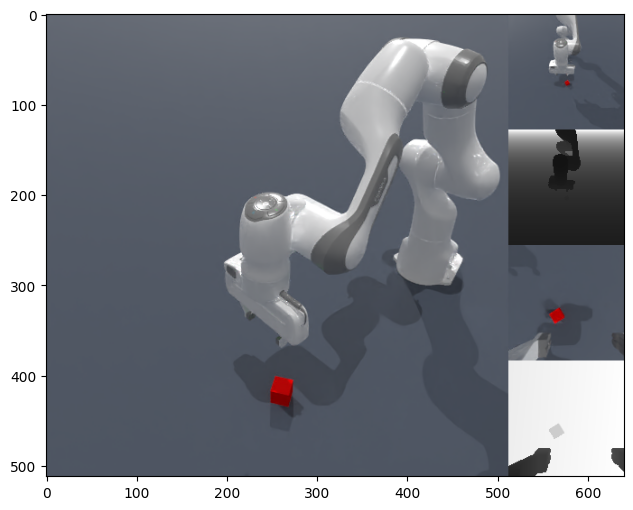

In [3]:
# Enable ray tracing
env = gym.make("PickCube-v0", shader_dir="rt")
plot_img(env.render("cameras"))
env.close()
del env

The configuration of ray tracing can be set through `render_config`. Please refer to the source code of `mani_skill2.envs.sapien_env::BaseEnv` and <https://sapien.ucsd.edu/docs/latest/tutorial/rendering/raytracing_renderer.html> for  details.

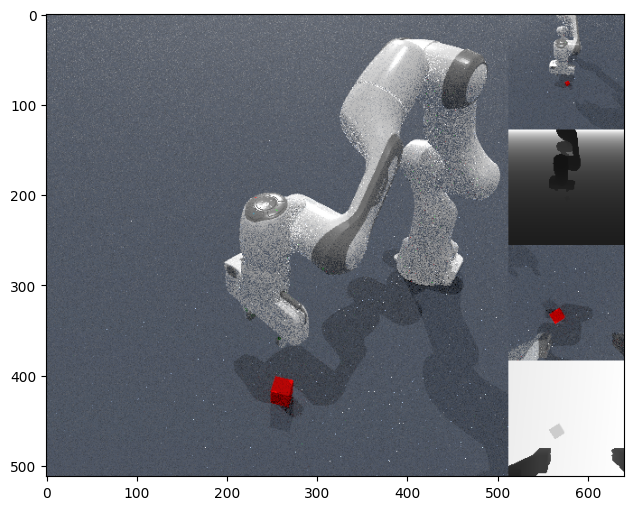

In [5]:
env = gym.make(
    "PickCube-v0",
    shader_dir="rt",
    # The default is {"rt_samples_per_pixel": 32, "rt_use_denoiser": True}
    render_config={"rt_samples_per_pixel": 2, "rt_use_denoiser": False},
)
plot_img(env.render("cameras"))
env.close()
del env

## Realistic Stereo Depth

ManiSkill2 can provide realistic stereo depth supported by SAPIEN. SAPIEN is integrated with a real-time active stereo sensor simulation pipeline that will produce depth similar to real-world depth sensors. Please see <https://sapien.ucsd.edu/docs/latest/tutorial/rendering/depth_sensor.html> for details.

In [ ]:
# Enable stereo depth
env = gym.make(
    "PickCube-v0",
    obs_mode="rgbd",
    shader_dir="rt",
    camera_cfgs={"use_stereo_depth": True, "height": 512, "width": 512},
)
obs = env.reset()
plot_img(obs["image"]["hand_camera"]["depth"], title="hand_camera/depth")
plot_img(obs["image"]["base_camera"]["depth"], title="base_camera/depth")
env.close()
del env

In [2]:
# Enable stereo depth
env = gym.make(
    "PickCube-v0",
    obs_mode="pointcloud",
    shader_dir="rt",
    camera_cfgs={"use_stereo_depth": True, "height": 512, "width": 512},
)
obs = env.reset()
env.close()
del env

import trimesh
v = obs['pointcloud']['xyzw'][...,:3]
m = obs['pointcloud']['xyzw'][..., 3] > 0
rgb = obs['pointcloud']['rgb']
s= trimesh.Scene([trimesh.points.PointCloud(v[m], rgb[m])])
s.show()

RuntimeError: vk::Queue::submit: ErrorDeviceLost